# Project: Investigating TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> TMDb is a large collection of data, downloaded from Kaggle, of over 10,000 movies from the years 1960-2015. The data set includes movie revenue, budget, genre, cast, director, votes. Looking at this dataset we can try to find the answers to some questions like:

> What are the characteristics of movies that generate above average revenues?

> Are high revenues related to high budgets?<br>
> What is the correlation between revenue and budget?<br> 
> Which genres generate higher revenue?<br>
> Which genres have higher ratings? Is there a relation betwen higher ratings and higher revenue?<br>
> Is there a trend in movie genres over the years?<br>
> Which directors created highest revenue movies?<br>

> In trying to answer these questions I will look at variables such as budget, genre, ratings(votes), and try to understand their relation to one another. I will take a sample of 10 top movies and analyze them further. I will use visuals to make it easier to understand the variable relations.

In [1]:
# import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, then trim and clean the dataset for analysis. 

### General Properties

In [104]:
df = pd.read_csv("Data/tmdb-movies.csv")

In [105]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [106]:
#column names
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [107]:
#number of rows and columns
df.shape

(10866, 21)

In [108]:
#data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning
> - Check for missing values
> - Drop any unused columns
> - Convert any non-integer column null values to 'unknonwn'
> - Delete duplicate rows

#### Find and Convert Null Values 

In [109]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### Drop unused columns

In [110]:
df.drop(['homepage','tagline','keywords','overview'], axis=1, inplace=True)

In [111]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


#### Replace 'NaN' values each with 'unknown', and confirm there are no 'NaN' values left

In [112]:
df.fillna('unknown', inplace=True)
df.isna().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### Find and Remove Duplicates

In [113]:
df.duplicated().sum()

1

In [114]:
df = df.drop_duplicates()
df.shape

(10865, 17)

<a id='eda'></a>
## Exploratory Data Analysis

> Now that the data is trimmed and cleaned, it is ready for exploration. Let's look at some statistics of the data set. Then we will create some visualizations addressing the research questions. 

>**Basic Statistics of the Data Set:**<br>
> Looking at the basic statistics of the dataset below, there are many columns that have 0 minimums. These need to be addressed since it will affect when calculating averages. I will implement imputation and replace zeros with averages of the columns.

In [115]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [116]:
def convert_zeros(df,column_name):
    '''
    Write a function to convert all zeros in a column to the mean value of that column
    '''
    
    return df[column_name].replace(0,df[column_name].mean(axis=0),inplace=True)


In [117]:
convert_zeros(df,'revenue')

In [118]:
convert_zeros(df, 'budget')

### General Research Question: What factors make a movie generate high revenue?

### Research Question 1: Are high revenue movies related to high budgets?

> When a movie make a lot of money, 

The average movie revenue is almost 40 million dollars. Maximum revenue earned is 2.8 billion dollars. There is a big difference between the average and the maximum earned.

In [102]:
#Find information about revenue
pd.DataFrame(df.revenue.describe())

,revenue
count,1.086500e+04
mean,6.187923e+07
std,1.110236e+08
min,2.000000e+00
25%,3.982690e+07
50%,3.982690e+07
75%,3.982690e+07
max,2.781506e+09


A quick look at the Revenue Graph below, we can see most of the movies revenues are less than 250 million. The graph is skewed to the right. 

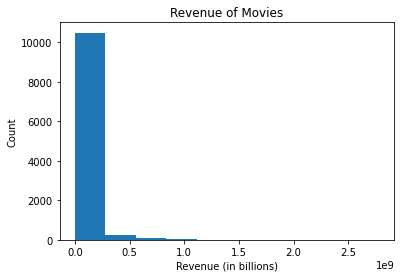

In [18]:
plot = df.revenue.plot(x='revenue',y='Count', kind='hist')
plot.set_xlabel('Revenue (in billions)')
plot.set_ylabel('Count')
plot.set_title('Revenue of Movies');

Find the mean and max adjusted Budget, impute zeros

In [19]:
#impute zeros
convert_zeros(df, 'budget')

In [20]:
pd.DataFrame(df.budget.describe())

,budget
count,1.086500e+04
mean,2.229110e+07
std,2.801385e+07
min,1.000000e+00
25%,1.462429e+07
50%,1.462429e+07
75%,1.500000e+07
max,4.250000e+08


The mean for budget is 22 million dollars, maximum budget for a movie is 425 million dollars.

Looking at the Budget Graph below we can see that most of the budgets for movies are below 25 million dollars. 

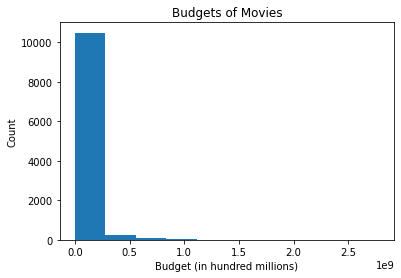

In [21]:
plot = df.revenue.plot(x='budget',y='Count', kind='hist')
plot.set_xlabel('Budget (in hundred millions)')
plot.set_ylabel('Count')
plot.set_title("Budgets of Movies");

Looking at the top 10 revenue earning movies and their budgets

In [22]:
#change to integers for easier readability on graph
df['revenue'] = df['revenue'].astype(int)
df['revenue'] = df['revenue'].astype(int)
df['budget'] = df['budget'].astype(int)
df['budget'] = df['budget'].astype(int)

In [23]:
#crate a new dataframe with movie titles and revenues, then graph
titles = df.sort_values(by='revenue', ascending=False).head(10).original_title
revenues = df.sort_values(by='revenue', ascending=False).head(10).revenue
budjets = df.sort_values(by='revenue', ascending=False).head(10).budget
top_movies_df = pd.DataFrame(zip(titles,revenues,budjets),columns=['Movie Title', 'Revenue(Billion)','Budget'])

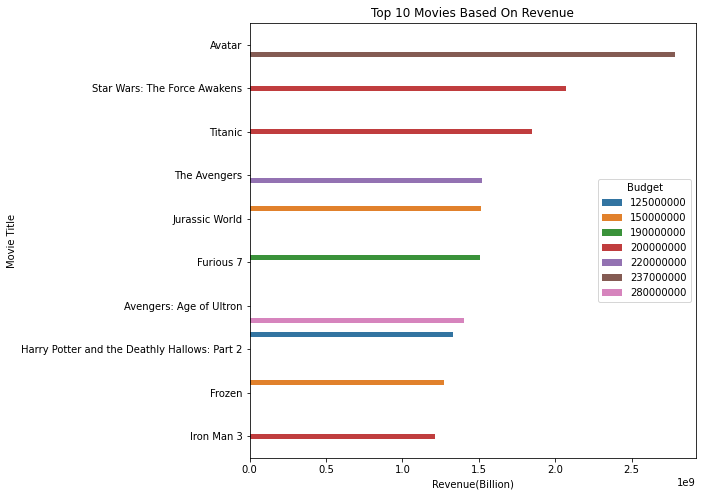

In [24]:
plt.figure(figsize=(8,8))
ax = sns.barplot(y='Movie Title', x='Revenue(Billion)', data=top_movies_df, orient='h',hue='Budget' )
ax.set_title('Top 10 Movies Based On Revenue');

>#### SUMMARY
>Looking at the bar graph above, the top four earning movies had over 100 million dollars in budgets. And the rest of the movies had well above average budgets as well.<br>
>According to this sample, top 10 revenue producing movies did also have high budgets.

### Research Question 2:  Is there a correlation between budget and revenue outside the sample of top 10 movies? Is there a trend in revenue and budget over the years?

>It is not surprising that highest revenue earning movies had very high budgets. But I would like to find out if  a sample of top 10 movies represent the revenue/budget relationship? 

> Looking at the graph below which shows the entire dataset, Revenues and Budgets have been rising since 1990s. After 2000's Revenues keep on rising sharply, where as Budgets' rise is minimal. 

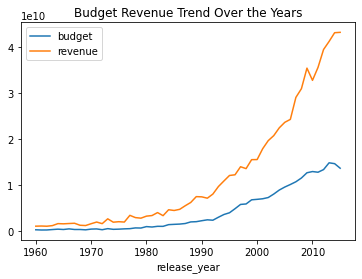

In [91]:
#trend for 'adjusted budget' and 'adjusted revenue' over the years
movie_revenues = df.groupby('release_year').sum()

movie_revenues[['budget','revenue']].plot(title='Budget Revenue Trend Over the Years');

#### Revenue vs Budget Graph

> Looking at the histogram below, we can see that though budgets have been expanding, revenues have been expanding more.

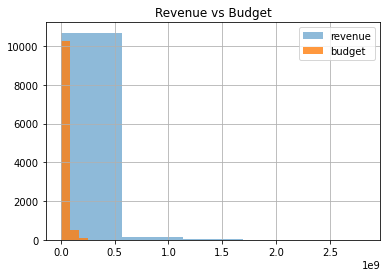

In [93]:
df.revenue_adj.hist(alpha=0.5, bins=5,label='revenue')
df.budget_adj.hist(alpha=0.8, bins=5,label='budget')
plt.legend()
plt.title('Revenue vs Budget');

In [27]:
#correlation between adjusted budget and adjusted revenue is moderate
df['budget_adj'].corr(df['revenue_adj'])

0.6466266122347984

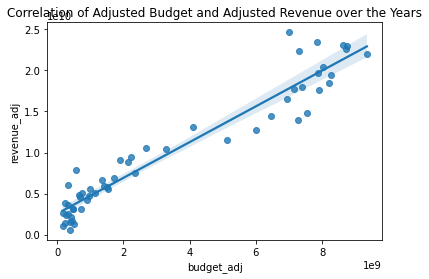

In [28]:
#correlation graph between adjusted budget and adjusted revenue over the years
ax = sns.regplot(x=movie_revenues['budget_adj'],y=movie_revenues['revenue_adj'])
ax.set_title("Correlation of Adjusted Budget and Adjusted Revenue over the Years");

>#### SUMMARY
> There is a moderate correlation between budget and revenue. As budgets for movies increased over the years, the revenues increased as well.

###  Research Question 3: What genres generate higher revenues?

> Genres of movies might play a role in how much money they produce? For example do Romance movies generate as much revenue as Action movies? That is the question I would like to find an answer to.

In [82]:
#create a new df with genres split
df_1 = df.assign(genres=df['genres'].str.split("|").explode('genres'))

In [83]:
#count the number of most genres released
df_2 = df_1.groupby(['genres'])[['id']].count().sort_values(by=['id'],ascending=False)[0:20]
df_2

,id
genres,
Drama,1922
Comedy,1493
Thriller,1214
Action,945
Horror,668
Romance,668
Adventure,567
Science Fiction,502
Crime,485


In [84]:
#create new df with filtered genres
df_new = df[df['genres'].isin(df_2.index.values.tolist())]

In [86]:
#filter for above zero revenue
df_new1 = df_new[df_new['revenue']>0]

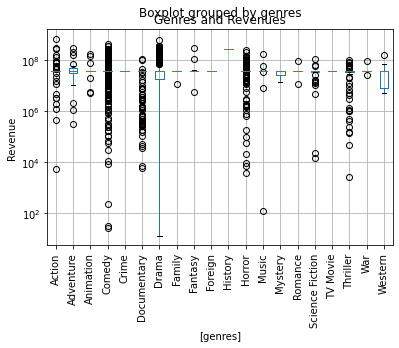

In [87]:
df_new1.boxplot(column=['revenue'], by=['genres'], rot=90).set_yscale('log')
plt.ylabel('Revenue')
plt.title('Genres and Revenues');

>Green dash indicates the average revenue. Darker rings indicate more count. So there are more Drama and Comedy movies, then Action, Adventure, and Animation. But all those genres have been making above average revenues.There were 1,900 Drama movies, many of which have made above average revenues. In contrast, Documentaries have been consistently producing below average revenues.

>Below is Genres and their budgets. Action and Fantasy movies have above average budgets.

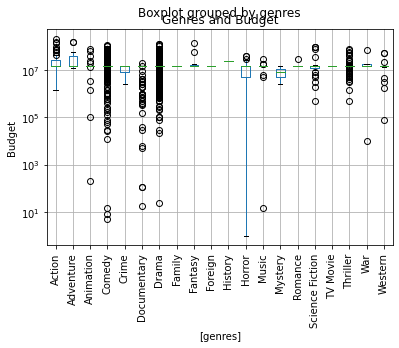

In [127]:
df_new1.boxplot(column=['budget'], by=['genres'], rot=90).set_yscale('log')
plt.ylabel('Budget')
plt.title('Genres and Budget');

> Below is a look at the statistics of Genres. It shows each Genre's mean revenue and standard deviation from the mean. Total revenue mean is around 60 million. According to the table below Action, Adventure and Fantasy have higher than average revenues, but they also have high deviation from the mean, which means their revenues varied more.

In [119]:
pd.DataFrame(df_new1.groupby(['genres'])['revenue'].describe().loc[:,['mean','std']])

,mean,std
genres,,
Action,6.039636e+07,9.524253e+07
Adventure,5.968305e+07,7.267887e+07
Animation,4.624374e+07,3.369873e+07
Comedy,5.153475e+07,4.999237e+07
Crime,3.982690e+07,0.000000e+00
Documentary,3.416924e+07,1.526525e+07
Drama,4.253031e+07,5.121522e+07
Family,3.808772e+07,6.956724e+06
Fantasy,6.734255e+07,8.140538e+07


>#### SUMMARY
>Even though there were not as many Animation and Action/Thriller movies released over the years, their revenue was higher than many other genres. Animation movies particularly had the highest revenues.<br>
> There were more Comedy and Drama movies released then any other genre over the years. Comedy had many movies below average revenues, Drama had most of movies at or above average revenues.<br> 
> Looking the statistics and the graphs Drama looks like the genre of movies that consistently have above average revenues.

### Research Question 4: Which genres had higher ratings? Do higher ratings result in higher revenues?

>Ratings are related to whether people liked the movie, some what liked the movie, or did not like the movie. Ratings can lead to more sales, or drop in sales. I would like to find out what genres have higher ratings over all, and did these highly rated movies have high revenues?

In [35]:
pd.DataFrame(df.vote_average.describe())

,vote_average
count,10865.000000
mean,5.975012
std,0.935138
min,1.500000
25%,5.400000
50%,6.000000
75%,6.600000
max,9.200000


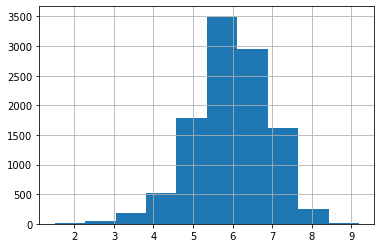

In [36]:
df.vote_average.hist();

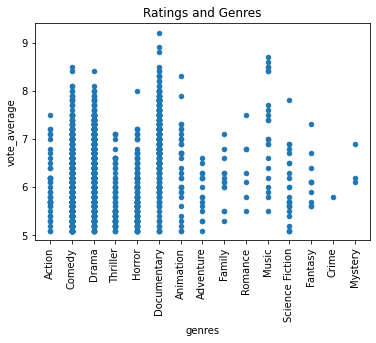

In [37]:
#movie genres that have above average votes
df_newpop=df_new[df_new['vote_average']>5] 
ax = df_newpop.plot.scatter(x='genres',y='vote_average');
ax.set_xlabel('genres')
plt.xticks(rotation='vertical')
ax.set_title('Ratings and Genres');

>The graph below shows the same graph in relation to revenues, we can see that most of the movies in the graph do not have have high revenues.

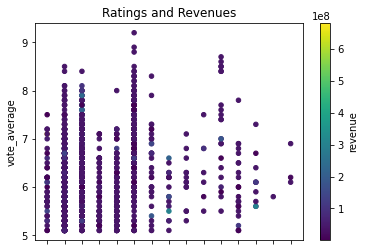

In [38]:
df_newpop=df_new[df_new['vote_average']>5] 
ax = df_newpop.plot.scatter(x='genres',y='vote_average', c='revenue',colormap='viridis')
ax.set_title('Ratings and Revenues');
#ax.set_xlabel('genres')
#plt.xticks(rotation='vertical');

>#### SUMMARY
> Documentary, Comedy and Drama movies have the highest ratings. High ratings doesn't necessarily correspond to high revenues.

### Research Question 5: Is there a trend in movie genres over the years?

> Are we seing more Action movies then we did in 1980s? Has there been an increase in Mstery movies? What about Documentaries? I would like to find out what genres have been trending over the years.

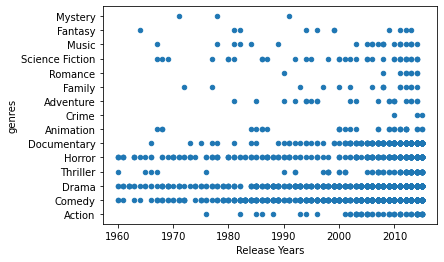

In [39]:
#plot movie genres over the years
ax = df_new.plot.scatter(y='genres',x='release_year');
ax.set_xlabel('Release Years');

>#### SUMMARY
> From the analysis of the data and looking at the graph we can see that the amount of movies in all genres kept on increasing through the years, especially after 1990s. The genre diversity increased overall as well.But in general Comedy and Drama consistently have high count of movie releases. There has been a rise in Documentary, Horror, Action, and Thriller movies after 1990s.  

### Research Question 6: Which directors created highest revenue movies?

> Do some directors generate higher revenues? If you hire a certain director to direct a movie, is it guaranteed to have high returns? 

In [96]:
#split directors names and exclude rows with no director names
df_1 = df.assign(director=df['director'].str.split("|").explode('director'))
df_1 = df_1[df_1['director']!= 'unknown']

In [137]:
#create a new df with directors with most amount of movies
df_dir = pd.DataFrame(df_1.groupby(['director'])[['id']].count().sort_values(by=['id'],ascending=False)[:15])
df_dir

,id
director,
Woody Allen,38
Steven Spielberg,27
Clint Eastwood,26
Martin Scorsese,24
Ridley Scott,23
Steven Soderbergh,22
Ron Howard,21
Joel Schumacher,19
Robert Rodriguez,19


In [138]:
#statistics about the directors
df_newdir= df[df['director'].isin(df_dir.index.values.tolist())]
pd.DataFrame(df_newdir.revenue.describe())

,revenue
count,3.470000e+02
mean,1.074071e+08
std,1.466878e+08
min,3.066800e+04
25%,3.680580e+07
50%,3.982690e+07
75%,1.225765e+08
max,1.025467e+09


In [139]:
#movies that have revenues over 60 million
df_newdir1=df_newdir[df_newdir['revenue']>60000000]

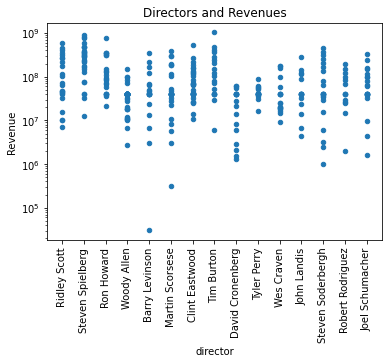

In [140]:
#directors of movies that had over 60 million dollar revenues
df_newdir.plot.scatter(y='revenue', x='director', rot=90).set_yscale('log')
plt.ylabel('Revenue')
plt.title("Directors and Revenues");

>#### SUMMARY
> Steven Spielberg, Ridley Scott, and Tim Burton has the highest movie revenues.

<a id='conclusions'></a>
## Conclusions

#### About the Data:
> Over 10% of the data had '0' entries for revenues and budgets. I did not want to totaly eliminate these rows because I still needed these rows to do analysis on other variables such as genres and votes. So I implemented, imputation, and replaced '0's with the means of the columns. The overall revenue mean shifted from 40 million to 62 million, so I am not sure if elimination of these rows would give a less bias result or not.
> On a side note 85% of the popularity data was also missing which prevented me from exploring this variable any further.<br>

#### Usage of statistics:

> In Revenue vs Budget analysis I used correlation. First, I took a sample of top 10 movies, then applied correlation formula to revenue and budget of all the movies.
> In genres and revenues analysis I used statistical means, and standard deviation to compare revenues of different genres. Using statistical means was very useful in especially visualization where each genre fell. The sample I used was 90% of the whole dataset, so it was much larger than a sample.   


#### Summary of Findings:
> According to the movie data that spans almost 50 years and over 10,000 movies, I found that revenues and budgets for movies have been steadily increasing over the years.<br> 

> Drama movies had the over all highest count of movies and above average revenues.<br>

> Higher ratings does not necessarily correspond to higher revenues. Documentaries had the highest ratings with consistently below average reveneus.<br>

> The number of movies released over the years have risen 2,000% from 1960 to 2015. There have been many new additions of genres of movies released. Documentary, Thriller, Action movies are among them.<br> 

> I looked at the top 10 directors with the most amount of movies directed. Among this group of directors,who collectively directed about 250 movies, Steven Spielberg, Ridley Scott and Tim Burton were the top revenue generating directors.  

>What are the characteristics of movies that generate above average revenues?<br>
> The answer to this question is more complex. Based on the information I found above average revenue generating movies are in genres such as Drama, Action, Comedy, and Horror. They have above average budgets, were directed by experienced directors.

### References

<a href="https://stackoverflow.com/">Stack Overflow</a><br>
<a href="https://pandas.pydata.org/">Pandas</a><br>
<a href="https://seaborn.pydata.org/">Seaborn</a><br>
<a href="https://matplotlib.org/stable/plot_types/index.html">Matplotlib</a><br>